In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import geopandas as gpd
import pycountry
import warnings
warnings.filterwarnings('ignore')


Import the Covid-19 cases and deaths dataset

In [9]:
data= pd.read_csv('/Users/.../Downloads/covid_worldwide.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


In [11]:
data.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


Data cleaning and Pre-processing

In [17]:
# converting data types from string to numerical
data['Total Deaths']= data['Total Deaths'].astype(str).str.replace(',', '').astype(float)
data['Total Cases']= data['Total Cases'].astype(str).str.replace(',', '').astype(float)
data['Total Recovered']= data['Total Recovered'].astype(str).str.replace(',', '').astype(float)
data['Active Cases']= data['Active Cases'].astype(str).str.replace(',', '').astype(float)
data['Total Test']= data['Total Test'].astype(str).str.replace(',', '').astype(float)
data['Population']= data['Population'].astype(str).str.replace(',', '').astype(float)

In [18]:
# check the new datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Serial Number    231 non-null    int64  
 1   Country          231 non-null    object 
 2   Total Cases      231 non-null    float64
 3   Total Deaths     225 non-null    float64
 4   Total Recovered  210 non-null    float64
 5   Active Cases     212 non-null    float64
 6   Total Test       213 non-null    float64
 7   Population       228 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 14.6+ KB


In [13]:
# showing columns with NA
data.isna().sum()

Serial Number       0
Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

In [21]:
# replacing the null values with minimum
a = data['Total Deaths'].min()
data['Total Deaths'].fillna(a, inplace = True)

b = data['Total Recovered'].min()
data['Total Recovered'].fillna(b, inplace = True)

c = data['Active Cases'].min()
data['Active Cases'].fillna(c, inplace = True)

d = data['Total Test'].min()
data['Total Test'].fillna(d, inplace = True)

e = data['Population'].min()
data['Population'].fillna(e, inplace = True)


#check for NA
data.isna().sum()

Serial Number      0
Country            0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Total Test         0
Population         0
dtype: int64

Data Analysis and Visualization
Plot the total number of cases worldwide

In [22]:
# total number of countries where the Covid-19 virus was found:
data['Country'].nunique()

231

In [26]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [41]:
# to use the gpd plot, we will create a country code column (iso_a3) for merging the datasets
def country_code_3(column):
    iso_a3=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
            iso_a3.append(code)
        except:
            iso_a3.append(country)
    return iso_a3
# create a column for code 
data['iso_a3']=country_code_3(data.Country)
data.head()
        
        

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,iso_a3
0,1,USA,104196861.0,1132935.0,101322779.0,1741147.0,1.159833e+09,3.348053e+08,USA
1,2,India,44682784.0,530740.0,44150289.0,1755.0,9.152658e+08,1.406632e+09,IND
2,3,France,39524311.0,164233.0,39264546.0,95532.0,2.714902e+08,6.558452e+07,FRA
3,4,Germany,37779833.0,165711.0,37398100.0,216022.0,1.223324e+08,8.388360e+07,DEU
4,5,Brazil,36824580.0,697074.0,35919372.0,208134.0,6.377617e+07,2.153536e+08,BRA


In [45]:
# merge the world dataset with our dataset using iso_a3 column
final_data = pd.merge(data, world, on='iso_a3')
# merge with the geolocation data 
geo_loc = pd.read_csv('/Users/.../Downloads/country_lat_lon.csv') 
# source: https://www.kaggle.com/datasets/paultimothymooney/latitude-and-longitude-for-every-country-and-state
final_df = final_data.merge(geo_loc,on='Country')
final_df.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,iso_a3,pop_est,...,name,gdp_md_est,geometry,country_code,latitude,longitude,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,2,India,44682784.0,530740.0,44150289.0,1755.0,915265788.0,1.406632e+09,IND,1.366418e+09,...,India,2868929,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",IN,20.593684,78.962880,NaN,NaN,NaN,NaN
1,3,France,39524311.0,164233.0,39264546.0,95532.0,271490188.0,6.558452e+07,FRA,6.705989e+07,...,France,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",FR,46.227638,2.213749,NaN,NaN,NaN,NaN
2,4,Germany,37779833.0,165711.0,37398100.0,216022.0,122332384.0,8.388360e+07,DEU,8.313280e+07,...,Germany,3861123,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...",DE,51.165691,10.451526,NaN,NaN,NaN,NaN
3,5,Brazil,36824580.0,697074.0,35919372.0,208134.0,63776166.0,2.153536e+08,BRA,2.110495e+08,...,Brazil,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",BR,-14.235004,-51.925280,ND,47.551493,-101.002012,North Dakota
4,6,Japan,32588442.0,68399.0,21567425.0,10952618.0,92144639.0,1.255848e+08,JPN,1.262649e+08,...,Japan,5081769,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",JP,36.204824,138.252924,NaN,NaN,NaN,NaN


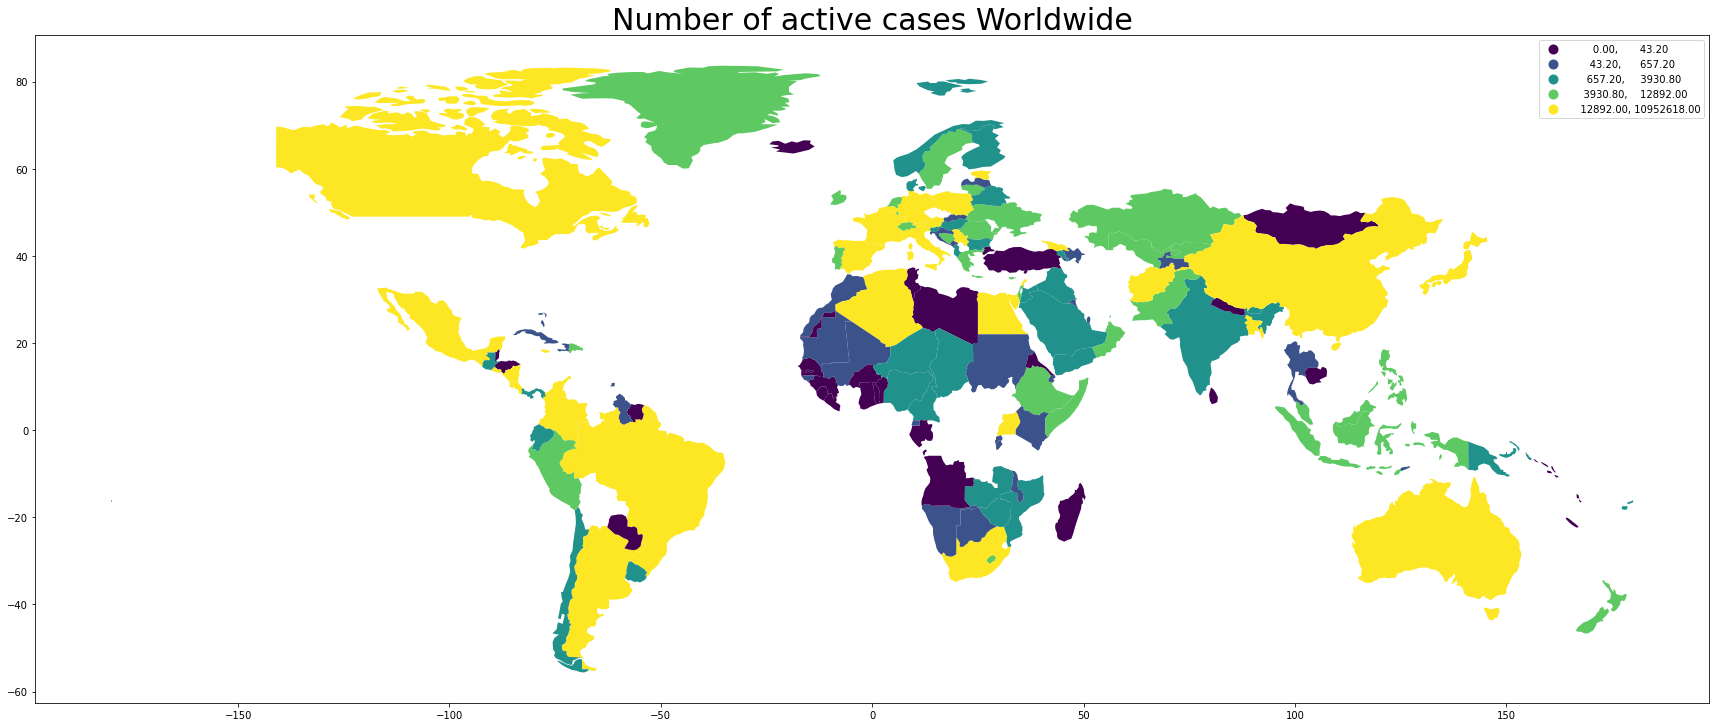

In [98]:
from geopandas import GeoDataFrame 
#tabular data structure that contains a column which contains a
#GeoSeries storing geometry.

GeoDataFrame(final_df).plot(column= 'Active Cases', scheme='quantiles', legend = True, figsize=(30,20))
plt.title('Number of active cases Worldwide', fontsize=30)
plt.show()

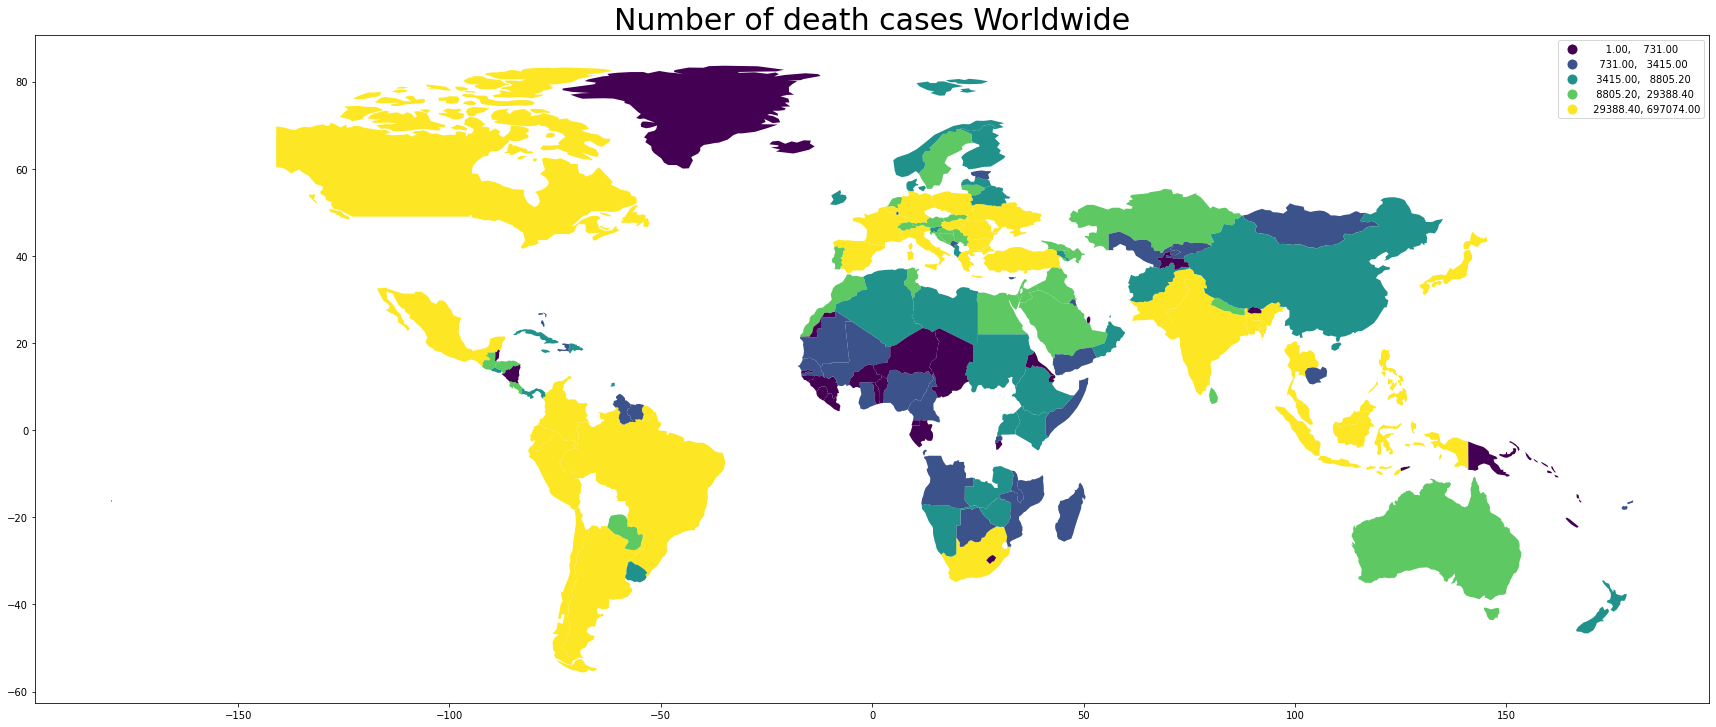

In [122]:
# total deaths plot
GeoDataFrame(final_df).plot(column= 'Total Deaths', scheme='quantiles', legend = True, figsize=(30,20))
plt.title('Number of death cases Worldwide', fontsize=30)
plt.show()

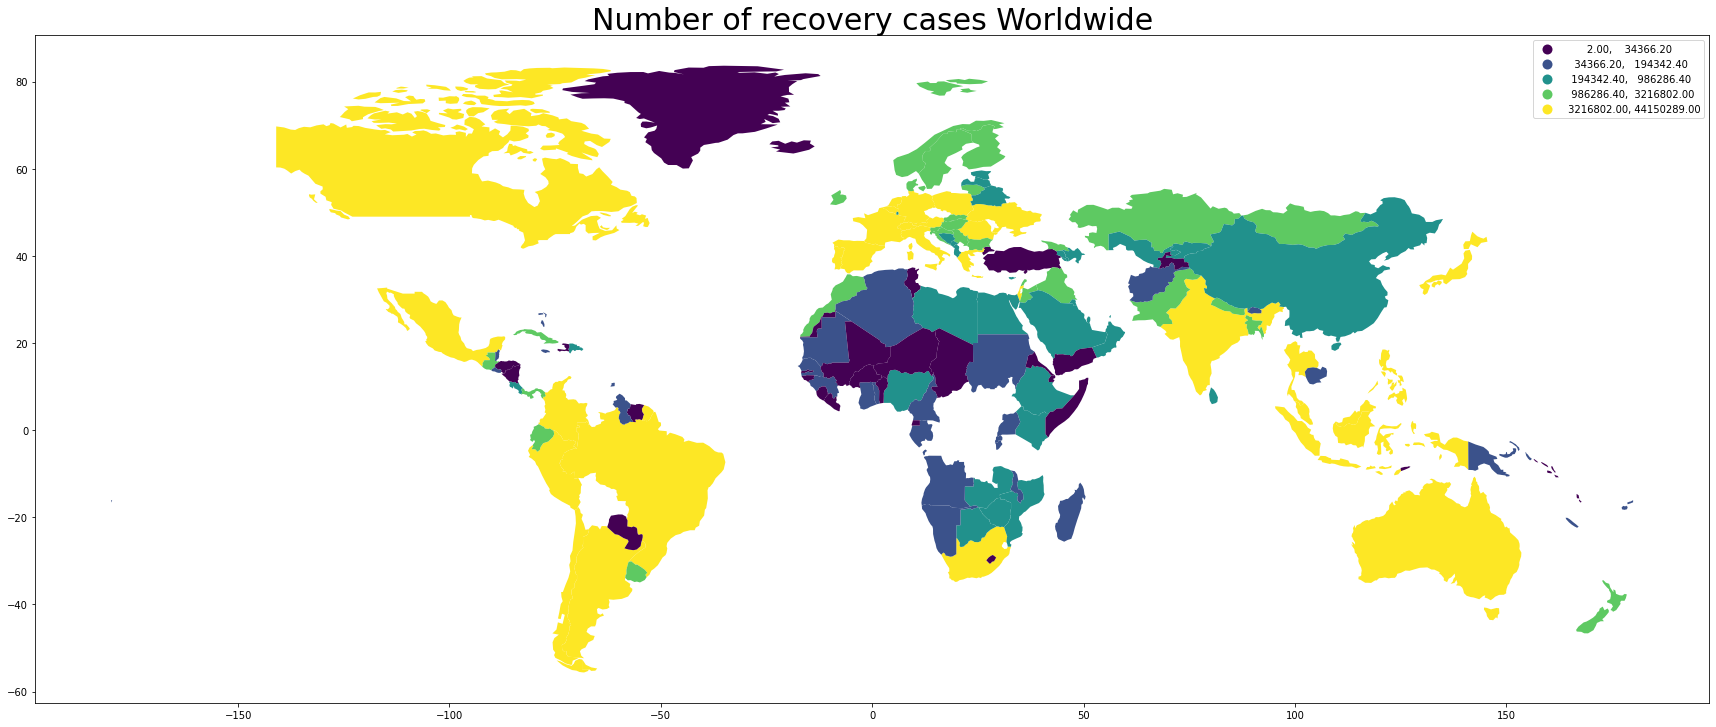

In [123]:
# Total recovery plot
GeoDataFrame(final_df).plot(column= 'Total Recovered', scheme='quantiles', legend = True, figsize=(30,20))
plt.title('Number of recovery cases Worldwide', fontsize=30)
plt.show()

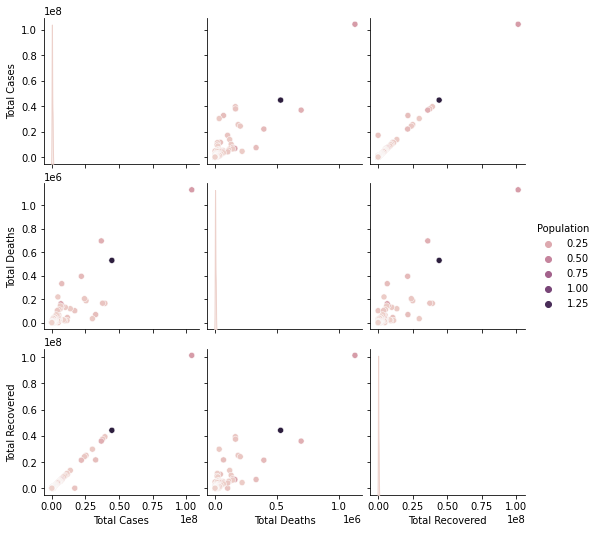

In [65]:
# pairplot showing the pairwise relationship in our dataset
# we are considering only few variables here

sns.pairplot(data, hue='Population', vars=['Total Cases','Total Deaths','Total Recovered'])

In [96]:
# Calculate the percentage of death and recovery countrywise
data['death_perc'] = (data['Total Deaths']/data['Population'])*100
data['recovery_perc']= (data['Total Recovered']/data['Population'])*100
data.head()


,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,iso_a3,death_perc,recovery_perc
0,1,USA,104196861.0,1132935.0,101322779.0,1741147.0,1.159833e+09,3.348053e+08,USA,0.338386,30.263197
1,2,India,44682784.0,530740.0,44150289.0,1755.0,9.152658e+08,1.406632e+09,IND,0.037731,3.138724
2,3,France,39524311.0,164233.0,39264546.0,95532.0,2.714902e+08,6.558452e+07,FRA,0.250414,59.868620
3,4,Germany,37779833.0,165711.0,37398100.0,216022.0,1.223324e+08,8.388360e+07,DEU,0.197549,44.583329
4,5,Brazil,36824580.0,697074.0,35919372.0,208134.0,6.377617e+07,2.153536e+08,BRA,0.323688,16.679254


In [129]:
print(data.max())

Serial Number              231
Country               Zimbabwe
Total Cases        1.04197e+08
Total Deaths       1.13294e+06
Total Recovered    1.01323e+08
Active Cases       1.09526e+07
Total Test         1.15983e+09
Population         1.40663e+09
iso_a3                     ZWE
death_perc             659.825
recovery_perc          47440.9
dtype: object


In [130]:
# country with highest death_percentage
print(data[data.death_perc == data.death_perc.max()])

    Serial Number Country  Total Cases  Total Deaths  Total Recovered  \
90             91   China     503302.0        5272.0         379053.0   

    Active Cases   Total Test  Population iso_a3  death_perc  recovery_perc  
90      118977.0  160000000.0       799.0    CHN  659.824781   47440.926158  


Hence, it shows China has the highest death percentage and also highest recovery ercentage in the world.

Text(0.5, 1.0, 'Correlation matrix between different variables')

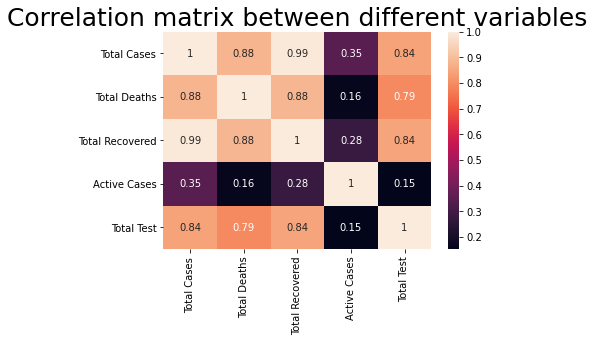

In [121]:
# create a correlation matrix

cor_data = data[['Total Cases','Total Deaths','Total Recovered', 'Active Cases', 'Total Test']]
sns.heatmap(cor_data.corr(), annot= True)
plt.title("Correlation matrix between different variables", fontsize= 25)

The above correlation matrix shows that total tests is highly correlated to total cases and total recovered. This makes sense as we get to know more cases when we test more and to know if someone has recovered or not, we do test again and again until the result comes negative.
It also shows that active cases is not correlated to total deats or total recovery or total cases. 